In [18]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Lambda

xform = Compose([ToTensor(), Lambda(lambda x: x.flatten())])

train_ds = MNIST(".", train=True, download=True, transform=xform)
valid_ds = MNIST(".", train=False, download=True, transform=xform)

In [19]:
train_ds_mask = train_ds.targets <= 1
train_ds.data = train_ds.data[train_ds_mask]
train_ds.targets = train_ds.targets[train_ds_mask]

valid_ds_mask = valid_ds.targets <= 1
valid_ds.data = valid_ds.data[valid_ds_mask]
valid_ds.targets = valid_ds.targets[valid_ds_mask]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.95it/s]


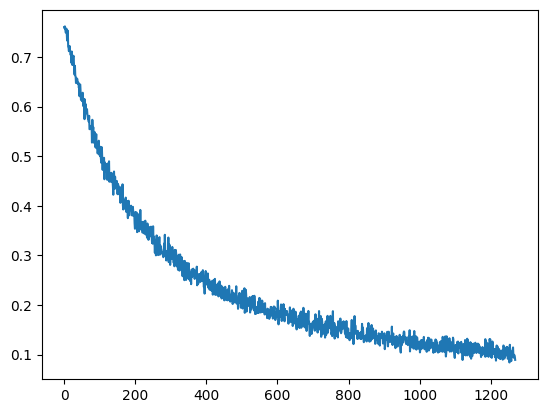

In [27]:
from tqdm import tqdm 

loader = torch.utils.data.DataLoader(train_ds, batch_size=100, shuffle=True)

model = torch.nn.Linear(784, 1)

epochs = 10
eta = 1e-3

optim = torch.optim.SGD(model.parameters(), lr=eta)

losses = []
for epoch in tqdm(range(epochs)):
    for xb, yb in loader:
        optim.zero_grad()
    
        y_pred = model(xb)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(y_pred, yb.unsqueeze(1).float(), reduction='mean')
        loss.backward()
    
        optim.step()
        
        losses.append(loss.detach())

plt.figure()
plt.plot(range(len(losses)), losses)

accuracy tensor([[0.9991]])


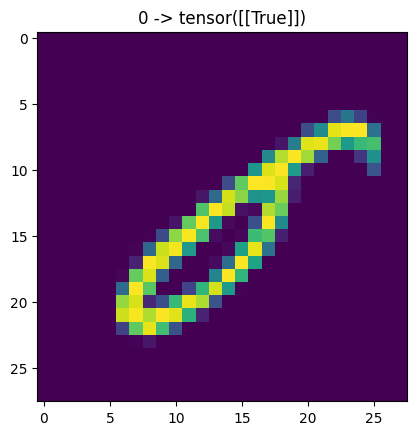

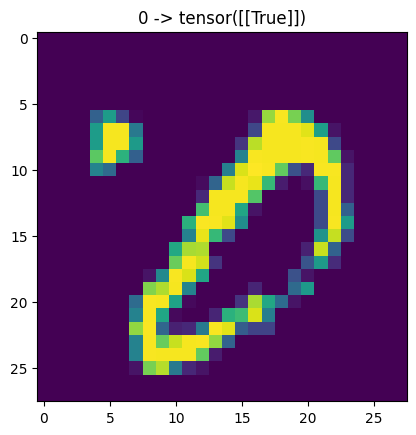

In [34]:
acc = 0
count = 0
for xb, yb in valid_ds:
    # print(model(xb.unsqueeze(0)))
    prediction = model(xb.unsqueeze(0))>0
    acc += prediction == yb
    count += 1
    if prediction != yb:
        plt.figure()
        plt.title(str(yb) + " -> " + str(prediction))
        plt.imshow(xb.reshape(28,28))

print("accuracy", acc/count)